In [71]:
% matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns

In [72]:
df = pd.concat([pd.read_csv(fname) for fname in glob("data/*.csv")])
df.columns = ["error", "drift", "time", "exit"]

In [73]:
df["ratio"] = df["drift"] / df["error"]

In [74]:
v = df.pivot_table(index="error", columns="ratio", values="time", aggfunc=pd.DataFrame.mean)
s = df.pivot_table(index="error", columns="ratio", values="time", aggfunc=pd.DataFrame.sem)
n = df.pivot_table(index="error", columns="ratio", values="time", aggfunc=pd.DataFrame.count)

In [75]:
v

ratio,0.001,0.00215443469003,0.00215443469003,0.00464158883361,0.00464158883361,0.01,0.0215443469003,0.0215443469003,0.0464158883361,0.0464158883361,...,0.215443469003,0.215443469003,0.215443469003,0.464158883361,0.464158883361,0.464158883362,1.0,2.15443469003,2.15443469003,4.64158883362
error,,,,,,,,,,,,,,,,,,,,,
0.002154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6957796.559748,NaN,NaN,NaN,3509361.129412,1492924.888235,646994.570588,NaN,162629.123529
0.004642,NaN,NaN,1470984.505882,NaN,1572804.841176,1658313.211765,NaN,1409586.352941,NaN,1311965.105882,...,NaN,NaN,792165.717647,NaN,429187.452941,NaN,256873.658824,NaN,75999.864706,NaN
0.010000,69893.282353,79088.552941,NaN,66400.164706,NaN,74801.470588,67250.582353,NaN,78896.376471,NaN,...,65411.494118,NaN,NaN,44085.005882,NaN,NaN,24242.454023,NaN,NaN,NaN


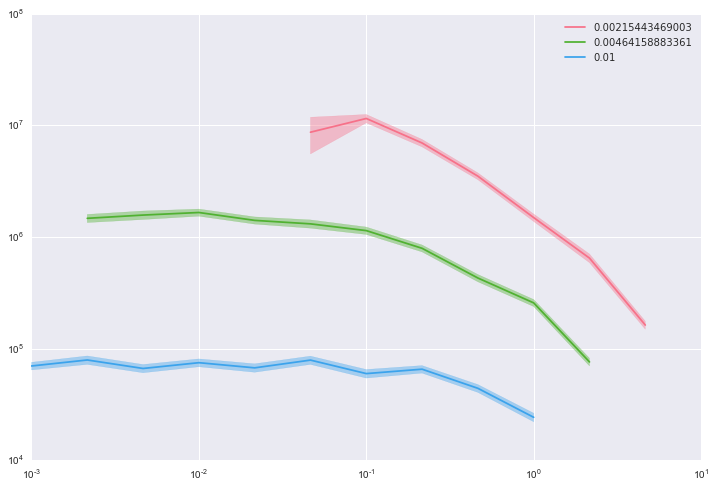

In [76]:
pal = sns.color_palette("husl", len(v))
plt.figure(figsize=(12, 8))
for idx, drift in enumerate(v.index):
    x = v.loc[drift, :].index
    y = v.loc[drift, :].values
    d = s.loc[drift, :].values
    sel = ~np.isnan(y)
    x = x[sel]
    y = y[sel]
    d = d[sel]
    plt.loglog(x, y, label=drift, color=pal[idx])
    plt.fill_between(x, y - d, y + d, color=pal[idx], alpha=0.4)
plt.legend()